As an introduction to computer vision, you are to perform the simple task of mood detection. Mood detection is the process of identifying and understanding a person's current emotional state. It can be done through a variety of methods, but we will focus on Facial expression recognition. Facial expressions are one of the most important cues for understanding human emotions. Mood detection systems can use computer vision techniques to analyze facial features and identify specific expressions, such as happiness, sadness, anger, you must attain the following objectives:

* Recognize when a face is yours or not.
* Recognize only your mood (happy, sad, angry, or confused).
* Perform testing to show the performance of your implementation.

#### Image generator for happy, sad, and confused.

In [ ]:
import cv2
import os

def detect(folder_path):

    face_cascade = cv2.CascadeClassifier(r'C:\Users\Jacob\Downloads\haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(r'C:\Users\Jacob\Downloads\haarcascade_eye.xml')
    camera = cv2.VideoCapture(0)

    i = 0  # Counter for saving images

    while True:
        ret, frame = camera.read()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        faces = face_cascade.detectMultiScale(gray, 1.3, 5)

        for (x, y, w, h) in faces:
            img = cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

            roi_gray = gray[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray, 1.03, 5, 0, (40, 40))

            #for (ex, ey, ew, eh) in eyes:
                #cv2.rectangle(img, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

            # Save the detected face region with a descriptive filename:
            face_filename = f"detected_face_{i}.jpg"
            face_path = os.path.join(folder_path, face_filename)
            cv2.imwrite(face_path, roi_gray)
            i += 1

            # Display the frame with detected faces and eye rectangles:
            cv2.imshow("camera", frame)

        if cv2.waitKey(1000 // 12) & 0xff == ord("q"):
            break

    camera.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    # Specify the folder path where you want to save detected faces:
    folder_path = r'C:\Users\Jacob\Downloads\Picz\Sad'  # Replace with your actual folder path
    detect(folder_path)

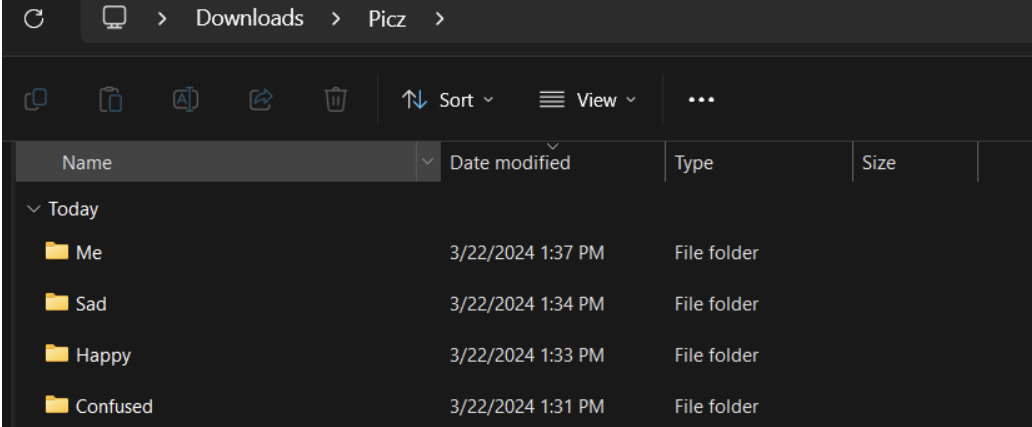

***The following code was used to generate images that will be used for the algorithm. I have only chosen one (1) picture for the algorithm to work with.***

***The actual folder path are replaced respectively, it could be sad, happy, or confused.***

***The image generated would be cropped based on the square and will then proceed to greyscale it.***

#### Code for the face recognizing function

In [ ]:
import numpy as np
import os
import errno
import sys
import cv2

def read_images(path, sz=None):
  c = 0
  X, y = [], []

  for dirname, dirnames, filenames in os.walk(path):
    for subdirname in dirnames:
      subject_path = os.path.join(dirname, subdirname)
      for filename in os.listdir(subject_path):
        try:
          if(filename == ".directory"):
            continue
          filepath = os.path.join(subject_path, filename)
          im = cv2.imread(os.path.join(subject_path, filename), cv2.IMREAD_GRAYSCALE)

          # Resize the images to the prescribed size
          if (sz is not None):
            im = cv2.resize(im, (200,200))

          X.append(np.asarray(im, dtype=np.uint8))
          y.append(c)

        except IOError as e:
          print(f"I/O Error({e.errno}): {e.strerror}")
        except:
          print("Unexpected error:", sys.exc_info()[0])
          raise
      c = c+1
  return [X, y]

#### Overall code for executing the program, and to identify the face whether it belongs to me or not, and to also identify it's corresponding mood (happy, sad, or confused).

In [ ]:
from functionz import read_images # Since this was used from another .py file, and this was done from Spyder
import numpy as np
import os
import errno
import sys
import cv2

image = r'C:\Users\Jacob\Downloads\Pics'

def face_rec():
    names = ['Unknown', 'Me'] # Put your names here for faces to recognize
    X, y = read_images(image, (200, 200))
    y = np.asarray(y, dtype=np.int32)
    model = cv2.face.EigenFaceRecognizer_create()
    model.train(X, y)
    camera = cv2.VideoCapture(0)q
    face_cascade = cv2.CascadeClassifier(r'C:\Users\Jacob\Downloads\haarcascade_frontalface_default.xml')
    happyImg = cv2.imread(r'C:\Users\Jacob\Downloads\Picz\Happy\detected_face_16.jpg')
    confusedImg = cv2.imread(r'C:\Users\Jacob\Downloads\Picz\Confused\detected_face_2.jpg')
    sadImg = r= cv2.imread(r'C:\Users\Jacob\Downloads\Picz\Sad\detected_face_12.jpg')

    # Mood Detection
    orb = cv2.ORB_create()
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    while True:
        ret, img = camera.read()
        if not ret:
            break

        faces = face_cascade.detectMultiScale(img, 1.3, 5)

        kp_happy, des_happy = orb.detectAndCompute(happyImg, None)
        kp_confused, des_confused = orb.detectAndCompute(confusedImg, None)
        kp_sad, des_sad = orb.detectAndCompute(sadImg, None)

        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
            roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)

            try:
                params = model.predict(roi)
                if 0 <= params[0] < len(names):
                    label = names[params[0]]
                else:
                    label = 'Unknown'
                cv2.putText(img, label , (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
            except:
                continue

            kp_frame, des_frame = orb.detectAndCompute(roi, None)

            if des_frame is not None:
                matches_happy = bf.match(des_happy,des_frame)
                matches_confused = bf.match(des_confused, des_frame)
                matches_sad = bf.match(des_sad, des_frame)

                sorted_matches_happy = sorted(matches_happy, key = lambda x:x.distance)
                sorted_matches_confused = sorted(matches_confused, key = lambda x:x.distance)
                sorted_matches_sad = sorted(matches_sad, key = lambda x:x.distance)

                happy_score = len(sorted_matches_happy)
                confused_score = len(sorted_matches_confused)
                sad_score = len(sorted_matches_sad)

                mood = max((happy_score, "Happy"), (confused_score, "Confused"), (sad_score, "Sad"), key=lambda x: x[0])[1]
                cv2.putText(img, f"Mood: {mood}", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)


        cv2.imshow("camera", img)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    camera.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    face_rec()

***ORB (Oriented FAST and Rotated BRIEF) is an OpenCV algorithm which is used for feature extraction especially in computer vision and image processing tasks. This algorithm was used as this was a better efficient alternative to SIFT or SURF algorithms (algorithms also under OpenCV).***

***As shown above, the code only generates one image for ORB to work with, and it is to be expected that it will work fine. Coming from the image generator, I have chosen one image that perfectly defined the mood that I was training the algorithm with.***

#### Screenshots for testing:

##### Happy

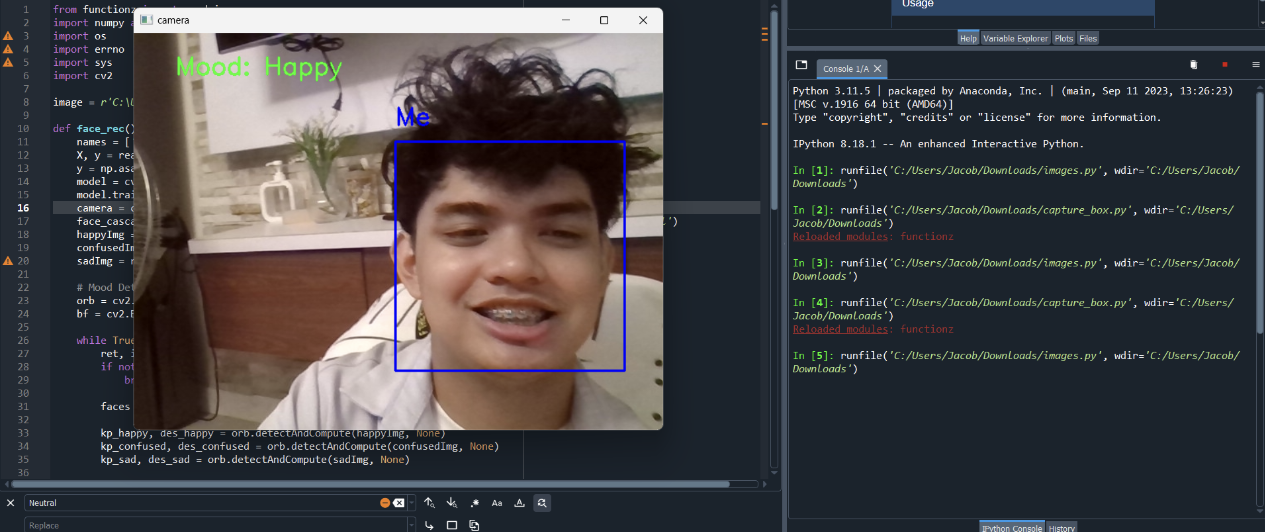

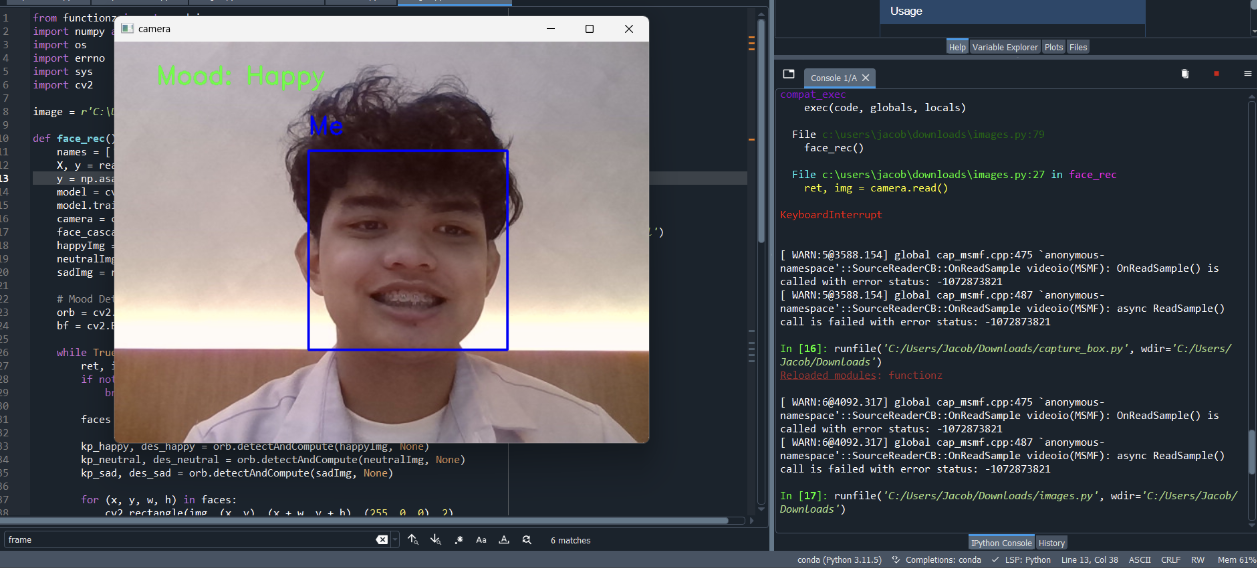

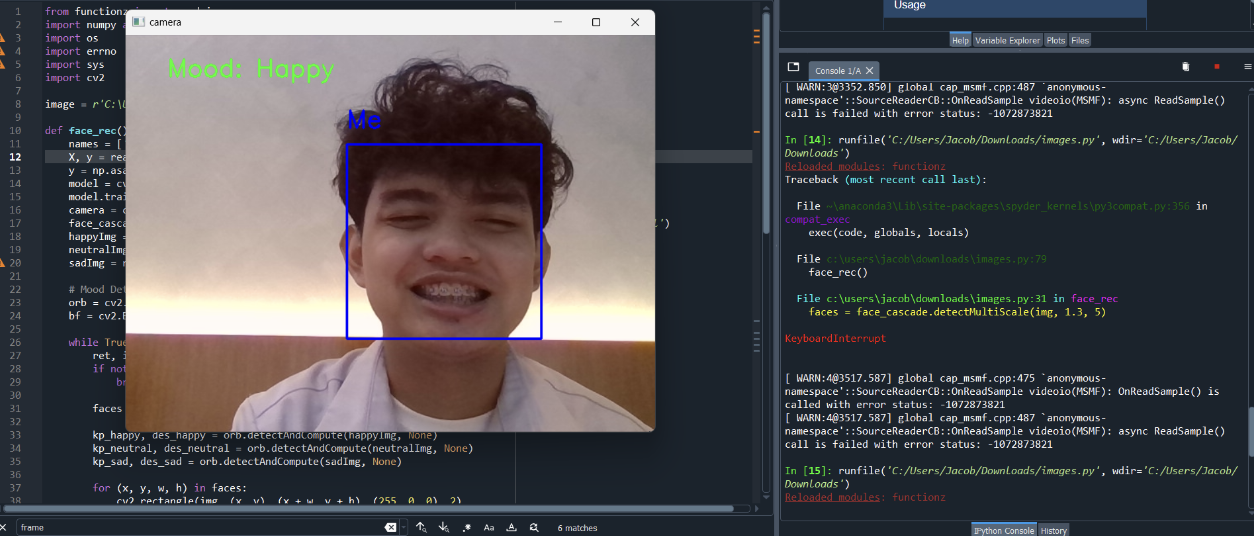

***The model did not have any difficulty in recognizing the 'Happy' mood, I have chosen a grayscale image from the image generator that featured me smiling with my teeth. Since this is an algorithm that is used for feature extraction, whenever I smile with my teeth on the camera, the algorithm automatically tells or prints out that my mood is happy.***

##### Sad

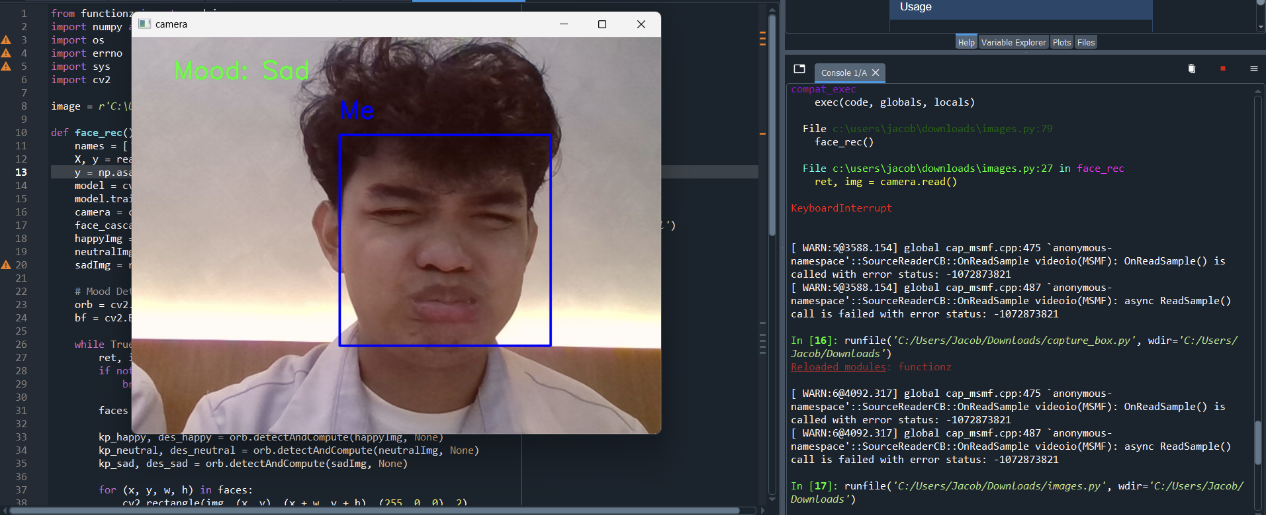

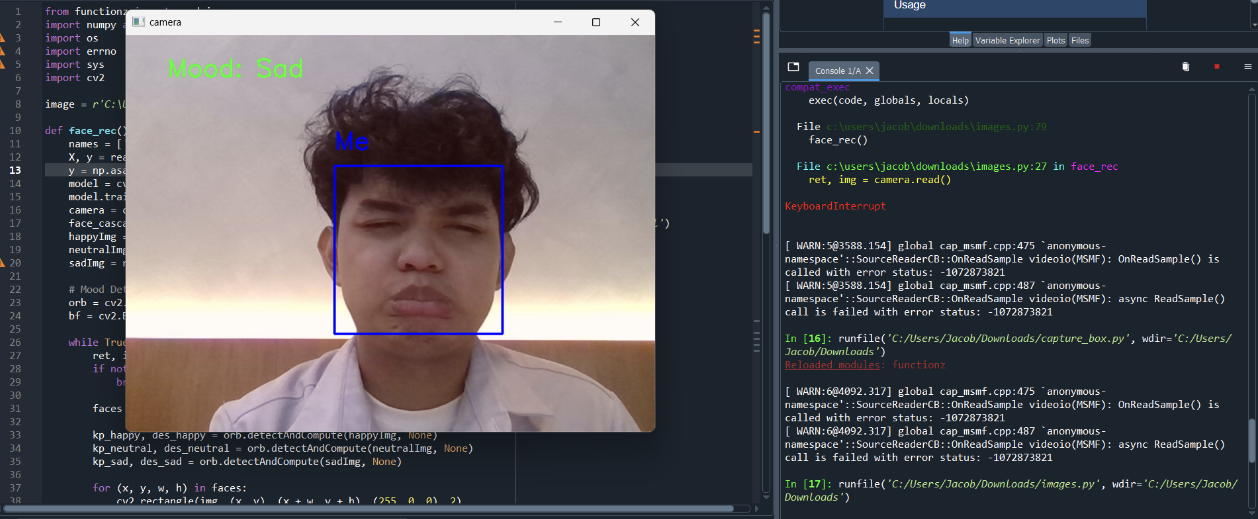

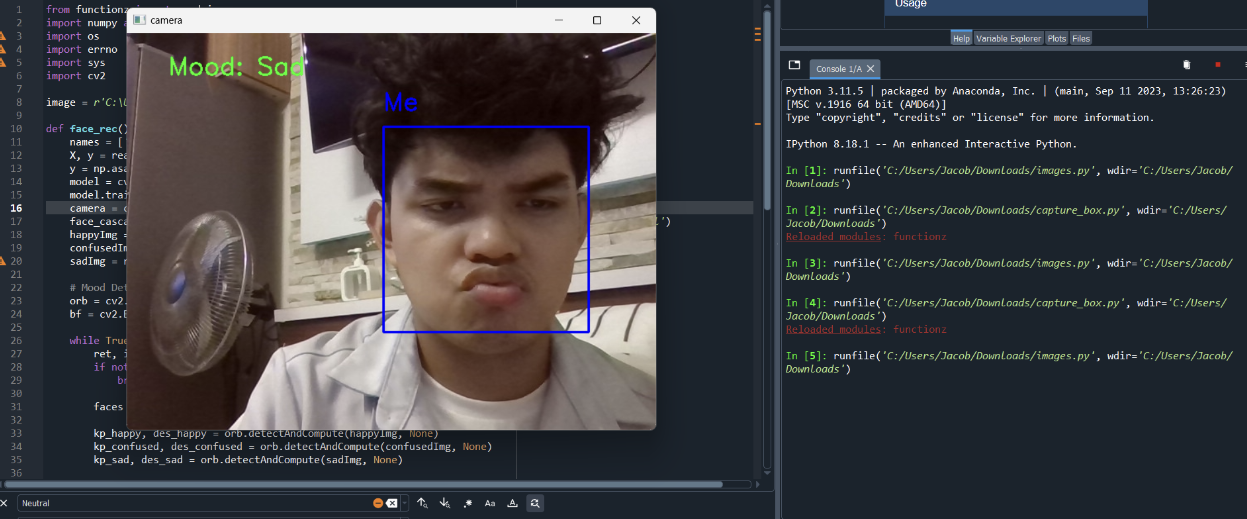

***This mood was relatively hard to deal with, and the algorithm fluctuated a little. Even though the picture that I have chosen is me pouting - the algorithm still has little difficulty in telling whether I am sad. The mood that it is often interchanged with is confused. It is probably fluctuating because the pose that I have in sad and confused are quite similar; henceforth, it explains the little difficulty the algorithm is experiencing when trying to detect the 'Sad' mood. Moreover, I had to carefully furrow my eyebrows and exactly pout (te same with the image that I had chosen) for the algorithm to tell that I was sad.***

##### Confused

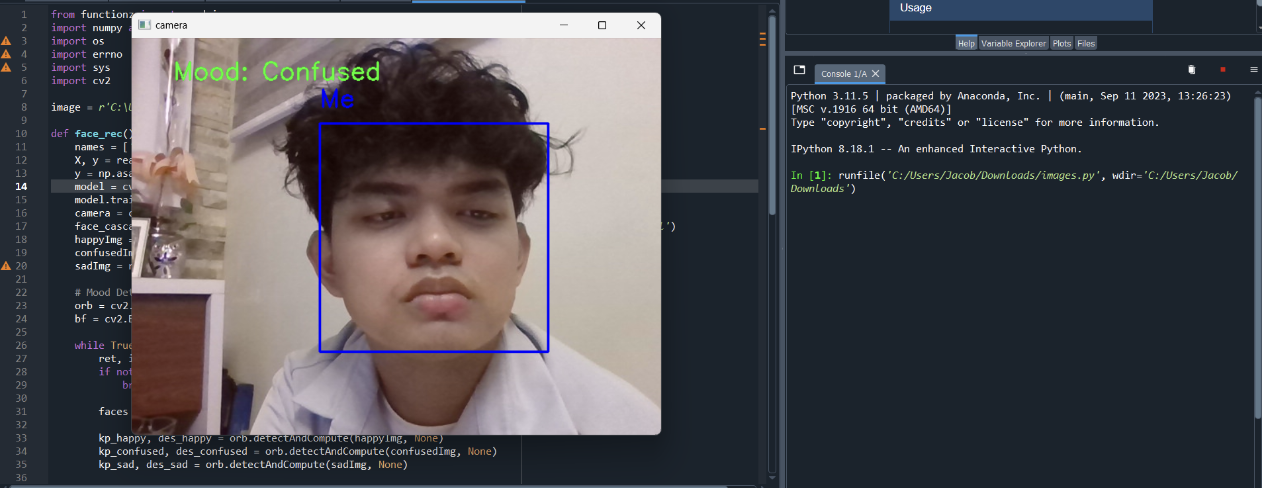

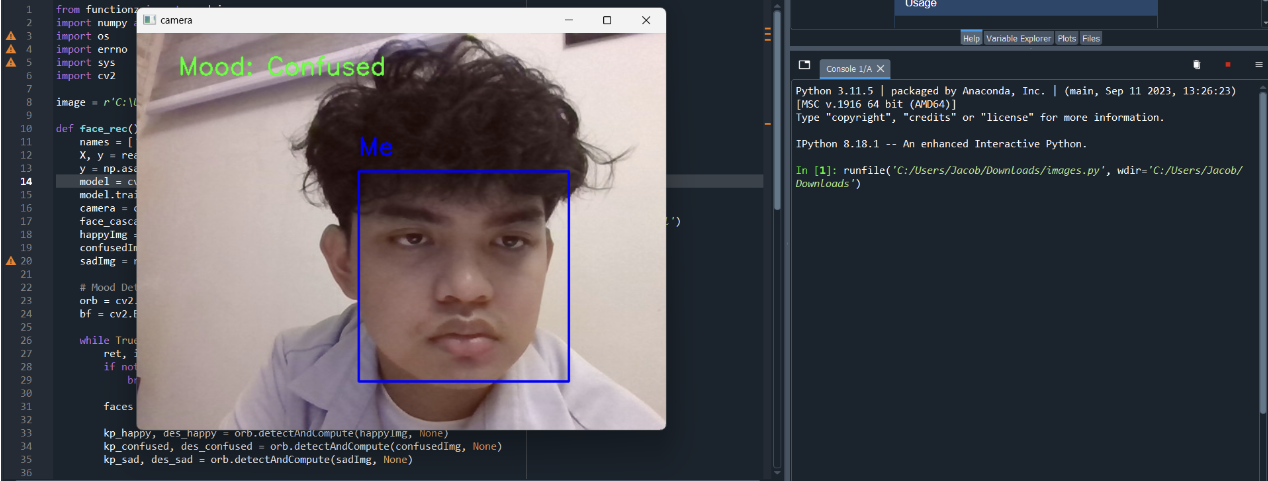

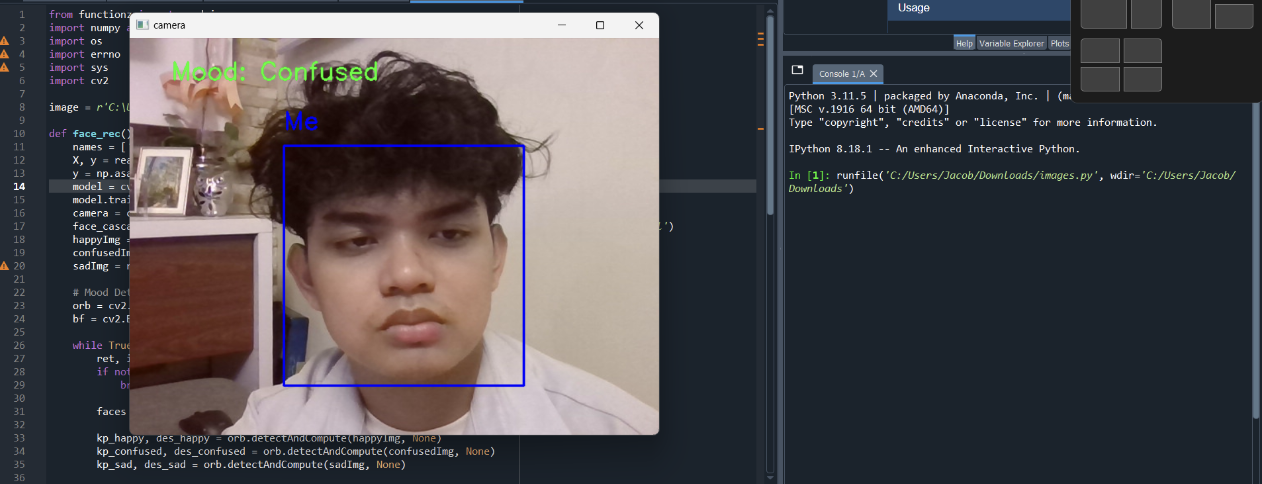

***Likewise with the happy mood, the model also did not have any difficulty in detecting when my face is confused - although sometimes it rarely fluctuates and tells that my mood is currently sad (since both of my expressions are quite similar). Although it did fluctuate a little, it is much more robust compared to the sad mood, since the model easily detected whether my face was confused or not.***

##### Unknown

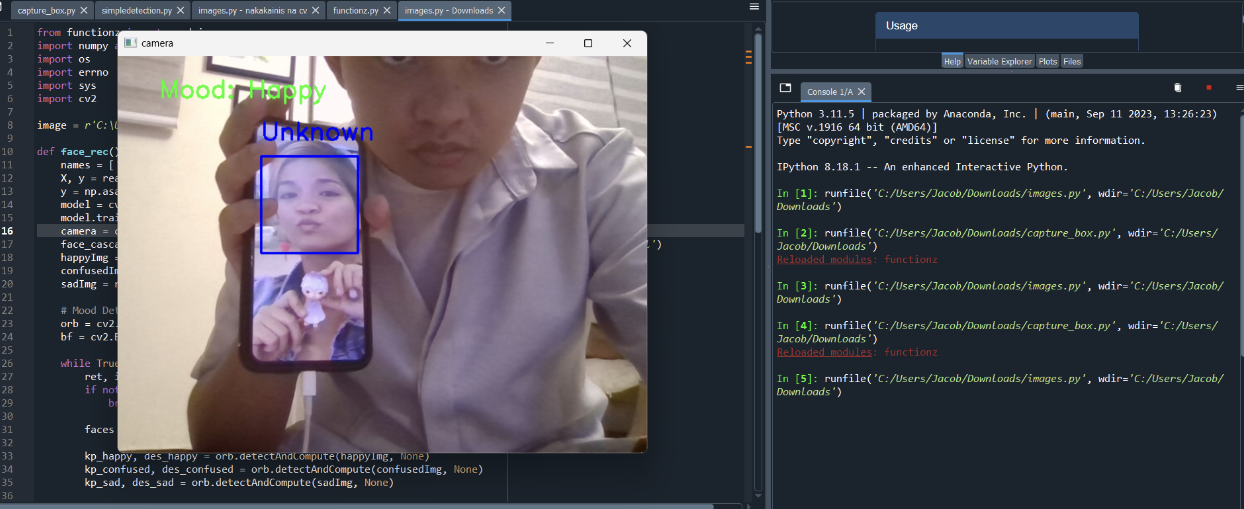

***This is also one of the objectives, whether to identify if the face belongs to me or not. If not, the model will print out 'unknown' along with its corresponding mood.***

***Evidently, the algorith had little to no difficulty in predicting whether the face belonged to me or not - at the same time, it also identified that the mood of the person in the picture was happy - which was reflective in the picture.***

***Therefore, it could be concluded that ORB is indeed an efficient algorithm under OpenCV.***

## Conclusion:

***To overall conclude this assignment, it demonstrated feature extraction and face recognition at the same time - which was interesting since this assignment introduced one of the fundamentals in computer vision and image processing.***

***I find this assignment helpful, since this may be used when extracting features of an image - it is also reliable since I only had to choose only one picture for the chosen algorithm (ORB) to work with. Although it had some little fluctuations, it can still be inferred that the model performed well in detecting the moods and recognizing whether the face belonged to me or not. Fortunately, it also worked with other faces.***

***There are still alternative algorithms that are available under OpenCV; however, the speed in calculating and identifying the keypoints of an image is fast compared to other algorithms and powerful scale performance - which can aid in detecting features despite the varying resolution of the camera is why the ORB algorithm was chosen.***